# Testing PMT linearity on 23-9-2020
SRS 445A with input impedance set to 500Ohm and 3x 5 gain stages chained  
10 kHz lowpass filter to PXIe 5171 DAQ system  
scanning through PMT voltages and background light to view gain behaviour

In [1]:
import numpy as np
from utils.plot_utils import *
import matplotlib.pyplot as plt

In [2]:
"""
First row is DAQ value in mW with the detection laser off
Second row with detection laser on
"""
no_light = np.array([[5.5, 5.48, 5.2, 4.8],[-66.4, -107, -256, -528]]) # mV
rot_cooling = np.array([[-11.6, -21.6, -55.6, -120.5], [-83, -135.3, -312.9, -664.0]]) # mV
all_light = np.array([[-14.8, -25.4, -64.0, -136.6], [-86.4, -138.1, -319.1, -676.4]]) # mV

In [3]:
no_light_diff = np.abs(np.diff(no_light, axis = 0).flatten())
rot_cooling_diff = np.abs(np.diff(rot_cooling, axis = 0).flatten())
all_light_diff = np.abs(np.diff(all_light, axis = 0).flatten())
voltages = np.array([-700, -750, -850, -950]) # V

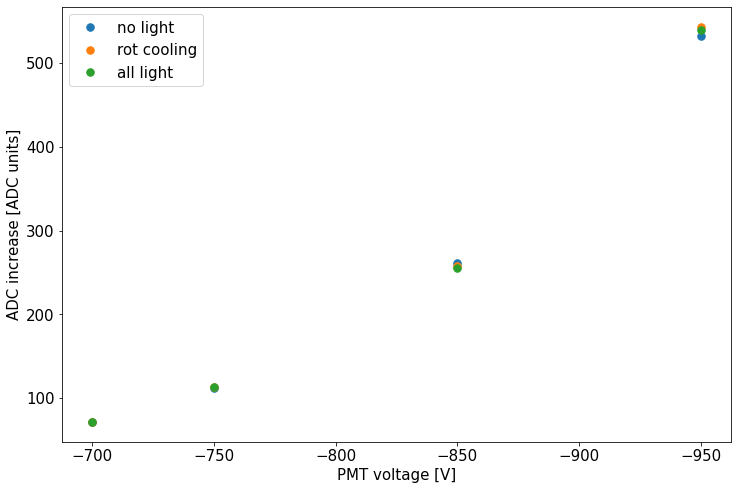

In [4]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(voltages, no_light_diff, '.', ms = 15, label = 'no light')
ax.plot(voltages, rot_cooling_diff, '.', ms = 15, label = 'rot cooling')
ax.plot(voltages, all_light_diff, '.', ms = 15, label = 'all light')
ax.legend(fontsize = 15)

ax.invert_xaxis()

ax.set_xlabel('PMT voltage [V]')
ax.set_ylabel('ADC increase [ADC units]')
set_fontsize(ax, 15)

In [5]:
def div_current(voltage, resistor = 330e3):
    return voltage/(12*resistor)

def pmt_current(voltage, amp = 125, term = 500):
    return voltage/amp/term

In [6]:
I_div = div_current(voltages)
I_div

array([-0.00017677, -0.00018939, -0.00021465, -0.0002399 ])

In [7]:
current_ratio_no_light = pmt_current(no_light[1,:]/1e3)/I_div
current_ratio_rot_cooling = pmt_current(rot_cooling[1,:]/1e3)/I_div
current_ratio_all_light = pmt_current(all_light[1,:]/1e3)/I_div

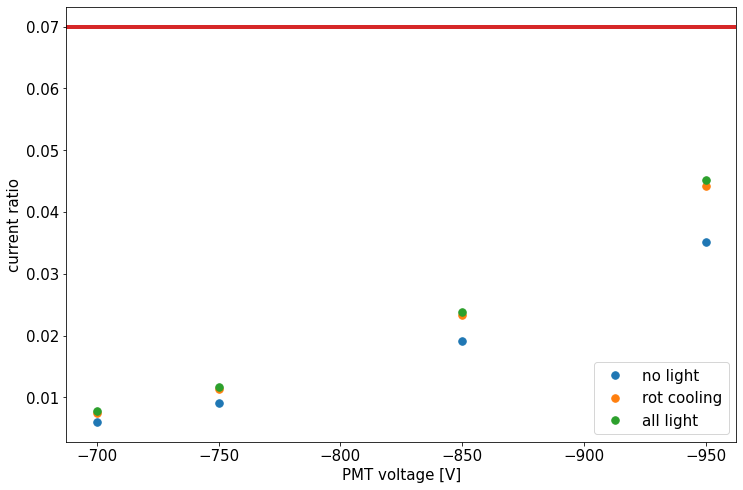

In [8]:
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(voltages, current_ratio_no_light, '.', ms = 15, label = 'no light')
ax.plot(voltages, current_ratio_rot_cooling, '.', ms = 15, label = 'rot cooling')
ax.plot(voltages, current_ratio_all_light, '.', ms = 15, label = 'all light')
ax.invert_xaxis()

ax.set_xlabel('PMT voltage [V]')
ax.set_ylabel('current ratio')

ax.axhline(0.07, color = 'C3', lw = 4)

ax.legend(fontsize = 15)
set_fontsize(ax, 15)

Red line is approximately the current ratio where the PMT loses linearity according to the Hamamatsu PMT handbook.

In [9]:
pmt_current(no_light[1,:]/1e3)*1e3

array([-0.0010624, -0.001712 , -0.004096 , -0.008448 ])

## Additional light source
iPhone 6 LED to give extra background light.  
Had to reduce from 3 amp stages to 2 in order to not overload the final stage on the SRS 445A.  
Still overloaded the amplifier @-950V

In [10]:
voltages_phone = np.array([-700, -750, -850]) # V
phone_light = np.array([[-143, -222.8, -508.7], [-158.8, -245.3, -573.8]]) # mV
phone_light_diff = np.abs(np.diff(phone_light, axis = 0)).flatten() # mV
phone_light_diff *= 5 # account for single amp stage reduction

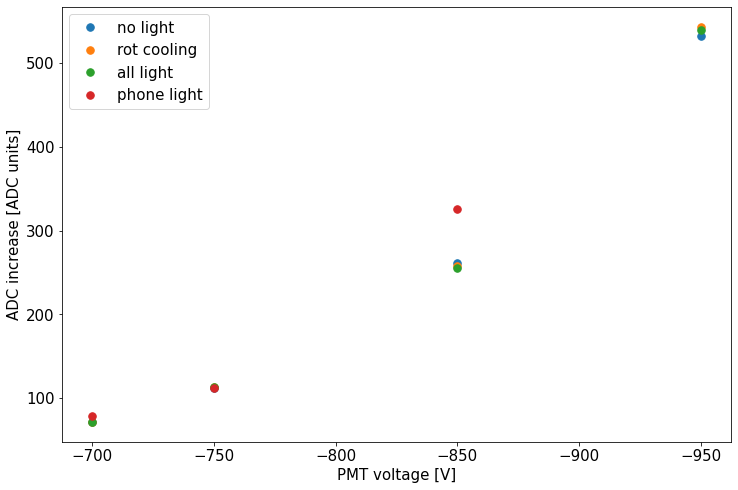

In [11]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(voltages, no_light_diff, '.', ms = 15, label = 'no light')
ax.plot(voltages, rot_cooling_diff, '.', ms = 15, label = 'rot cooling')
ax.plot(voltages, all_light_diff, '.', ms = 15, label = 'all light')
ax.plot(voltages_phone, phone_light_diff, '.', ms = 15, label = 'phone light')
ax.legend(fontsize = 15)

ax.invert_xaxis()

ax.set_xlabel('PMT voltage [V]')
ax.set_ylabel('ADC increase [ADC units]')
set_fontsize(ax, 15)

In [12]:
current_ratio_phone_light = pmt_current(phone_light[1,:]/1e3, amp = 25)/div_current(voltages_phone)

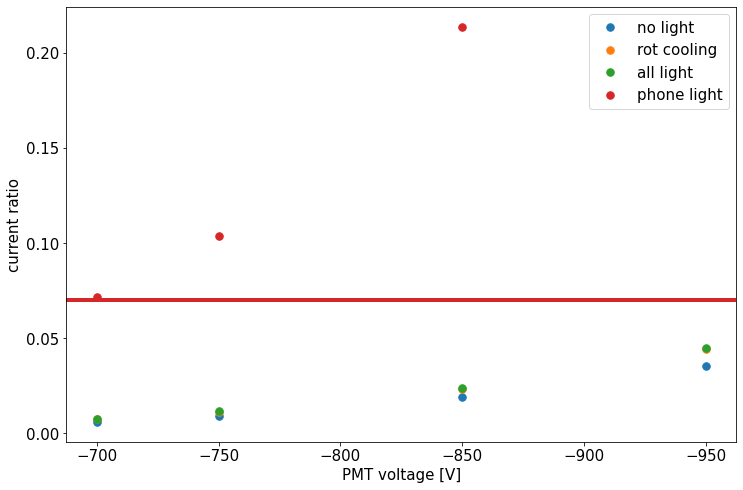

In [85]:
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(voltages, current_ratio_no_light, '.', ms = 15, label = 'no light')
ax.plot(voltages, current_ratio_rot_cooling, '.', ms = 15, label = 'rot cooling')
ax.plot(voltages, current_ratio_all_light, '.', ms = 15, label = 'all light')
ax.plot(voltages_phone, current_ratio_phone_light, '.', ms = 15, label = 'phone light')
ax.invert_xaxis()

ax.set_xlabel('PMT voltage [V]')
ax.set_ylabel('current ratio')

ax.axhline(0.07, color = 'C3', lw = 4)

ax.legend(fontsize = 15)
set_fontsize(ax, 15)